## 1. AIMD (TCP-Reno)

In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

'''
First, we design the function for the Regular AIMD Algorithm with the following parameters:
    Cap (int) : Maximum Capacity
    x1 (int) : Starting cnwd size of User x1
    x2 (int) : Starting cnwd size of User x2
    alpha (int) : 1
    beta (int) : 0.5
    output (str) : Output format of the graphs (.svg)
    title (str) : Title of the graphs
'''

def aimd_tcp_reno_plot(Cap:int, x1:int, x2:int, alpha:int, beta:int, output:str='output.svg', title:str='AIMD (TCP-Reno) Algorithm'):
    
    x1_values = np.empty((0,))
    x2_values = np.empty((0,))
    
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)
    
    optimal = Cap/2
    
    iterations = 1
    retransmissions = 0
    
    while (iterations < 1000):
        if (round(x1,2) == optimal and round(x2,2) == optimal):
            # If we reach optimum before running all iterations
            break
        
        if (x1 + x2 <= Cap):
            # Additive Increase
            x1 = x1 + alpha
            x2 = x2 + alpha
        
        else:
            # Multiplicative Decrease
            x1 = x1 * beta
            x2 = x2 * beta
            retransmissions += 1
            
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)
        
        iterations += 1
        
    # Optimal Point
    best_x1 = Cap/2
    best_x2 = Cap/2
    
    # Max values
    max_x1 = np.max(x1_values)
    max_x2 = np.max(x2_values)
    
    # Calculate sending rates (example values)
    avg_wndsize_x1 = np.mean(x1_values)
    avg_wndsize_x2 = np.mean(x2_values)
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    
    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)  # Fairness/Efficiency plot
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)  # Congestion window for x1
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)  # Congestion window for x2

    #Fairness Line for Plot1
    intersection_x = Cap / 2
    x_orange = np.linspace(0, intersection_x, 100)
    plot1.plot(x_orange, x_orange, linestyle='dashed', color='orange', label='Fairness Line')
     
    #Efficiency Line for Plot1
    plot1.plot([0, Cap], [Cap, 0], linestyle='dashed', color='blue', label='Efficiency Line')
    
    # Plot x1_values and x2_values with smaller markers and thinner lines
    plot1.plot(x1_values, x2_values, marker='o', color='black', markersize=3, linewidth=1)
    
    # Plot the Optimal Point
    plot1.plot(Cap/2, Cap/2, marker='o', markersize=4, label=f'Optimal Point ({best_x1:.2f}, {best_x2:.2f})', color='red')
    
    # Convergence Point
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', markersize=4, label=f"Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})", color='green')
    
    # Set axis limits to start from 0
    plot1.set_xlim(0, Cap)
    plot1.set_ylim(0, Cap)
    
    # Add title and axis labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")  # Change the X-axis label here
    plot1.set_ylabel("User 2's Allocation $x_{2}$")  # Change the Y-axis label here
    
    # Add annotations for Plot1
    plot1.legend(loc='upper right', ncol=2, frameon=False, fontsize=8)
    plot1.annotate(
        f'Capacity: {Cap}\nIterations- \nto-Optimum: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha$: {alpha}\n$\\beta$: {beta}\n',
        xy=(0.8 * Cap, Cap * 0.2), fontsize=8
    )
    
    # Congestion Window plot for User 1 in Plot 2
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1, markersize=4)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('cwnd Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations * 1.1)
    plot2.set_ylim(0, max(max_x1, 1.1*Cap/2))
    plot2.annotate(f'Average Window Size $x_{1}$: {avg_wndsize_x1:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot2.grid(False)
    
    # Efficiency line for Plot 2
    plot2.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Congestion Window plot for User 2 in Plot 3
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1, markersize=4)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('cwnd Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations * 1.1)
    plot3.set_ylim(0, max(max_x2, 1.1*Cap/2))
    plot3.annotate(f'Average Window Size $x_{2}$: {avg_wndsize_x2:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot3.grid(False)
    
    # Efficiency line for Plot 3
    plot3.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Add a main title for the figure
    fig.suptitle(title, fontsize=14)

    # Save and show the plot
    plt.savefig(output, dpi=300)
    plt.show()
    
    #STATISTICS
    avg_util = avg_wndsize_x1 + avg_wndsize_x2
    util_pcnt = avg_util/Cap * 100
    print (f"Utilization : {round(util_pcnt,2)}%")
    
    retransmission_rate = retransmissions/iterations * 100
    print(f"Retransmission rate = {round(retransmission_rate, 2)}%")
        

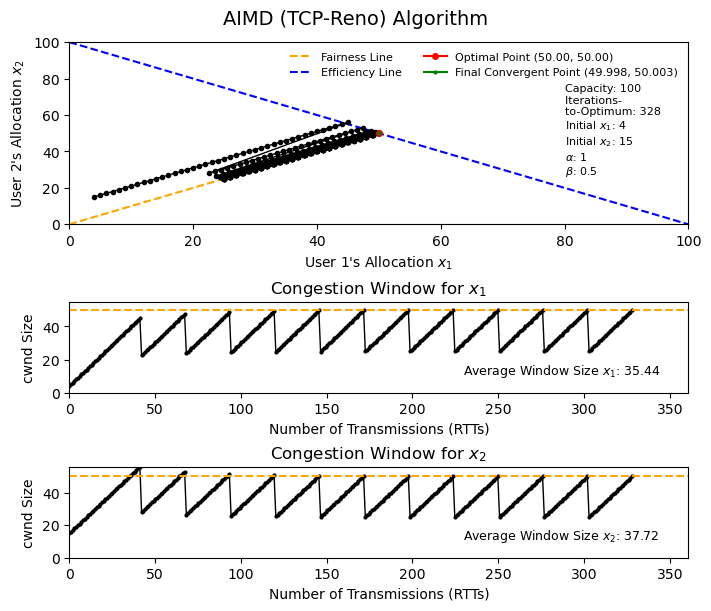

Utilization : 73.16%
Retransmission rate = 3.35%


In [2]:
aimd_tcp_reno_plot(
    Cap=100,
    x1=4,
    x2=15,
    alpha=1,
    beta=0.5,
    output=f"aimd_tcp_reno.svg"
)

In [3]:
if (round(25.000, 2) == 25):
    print("df")
else: 
    print("else")


df


## 2. Exponential-to-Linear AIMD

In [4]:
'''
The next algorithm is a variation on AIMD which uses an exponential additive function, 
which changes to linear after reaching max capacity the first time. 
    Cap (int) : Maximum Capacity
    x1 (int) : Starting cnwd size of User x1
    x2 (int) : Starting cnwd size of User x2
    alpha (int) : Experimentally Determined
    beta (int) : Experimentally Determined
    output (str) : Output format of the graphs (.svg)
    title (str) : Title of the graphs
'''

def exp_lin_aimd_plot(Cap:int, x1:int, x2:int, alpha:int, beta:int, output:str='output.svg', title:str='Exponential-to-Linear AIMD'):
    
    x1_values = np.empty((0,))
    x2_values = np.empty((0,))
    
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)
    
    optimal = Cap/2
    
    iterations = 1 
    retransmissions = 0
    iterations_to_optimum = 99999
    
    x1_temp = x1
    x2_temp = x2
    
    flag = 0
    
    while (iterations < 1000):
        if (round(x1,2) == optimal and round(x2,2) == optimal):
            # If we reach optimum before running all iterations
            iterations_to_optimum = iterations
            break
        
        if (x1 + x2 <= Cap):
            # Multiplicative Increase
            if (flag):
                x1 = x1 + 1
                x2 = x2 + 1
            else:
                x1 = x1 + alpha*x1
                x2 = x2 + alpha*x2         

        
        else:
            # Multiplicative Decrease
            x1 = x1 * (1-beta)
            x2 = x2 * (1-beta)
            flag = 1
            retransmissions += 1
            
            
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)
        
        iterations += 1
    
    
    # Optimal Point
    best_x1 = Cap/2
    best_x2 = Cap/2
    
    # Max values
    max_x1 = np.max(x1_values)
    max_x2 = np.max(x2_values)
    
    # Calculate sending rates (example values)
    avg_wndsize_x1 = np.mean(x1_values)
    avg_wndsize_x2 = np.mean(x2_values)
    
    
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    
    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)  # Fairness/Efficiency plot
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)  # Congestion window for x1
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)  # Congestion window for x2

    #Fairness Line for Plot1
    intersection_x = Cap / 2
    x_orange = np.linspace(0, intersection_x, 100)
    plot1.plot(x_orange, x_orange, linestyle='dashed', color='orange', label='Fairness Line')
     
    #Efficiency Line for Plot1
    plot1.plot([0, Cap], [Cap, 0], linestyle='dashed', color='blue', label='Efficiency Line')
    
    # Plot x1_values and x2_values with smaller markers and thinner lines
    plot1.plot(x1_values, x2_values, marker='o', color='black', markersize=3, linewidth=1)
    
    # Plot the Optimal Point
    plot1.plot(Cap/2, Cap/2, marker='o', markersize=4, label=f'Optimal Point ({best_x1:.2f}, {best_x2:.2f})', color='red')
    
    # Convergence Point
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', markersize=4, label=f"Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})", color='green')
    
    # Set axis limits to start from 0
    plot1.set_xlim(0, Cap)
    plot1.set_ylim(0, Cap)
    
    # Add title and axis labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")  # Change the X-axis label here
    plot1.set_ylabel("User 2's Allocation $x_{2}$")  # Change the Y-axis label here
    
    # Add annotations for Plot1
    plot1.legend(loc='upper right', ncol=2, frameon=False, fontsize=8)
    plot1.annotate(
        f'Capacity: {Cap}\nIterations- \nto-Optimum: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha$: {alpha}\n$\\beta$: {beta}\n',
        xy=(0.80 * Cap, Cap * 0.2), fontsize=8
    )
    
    # Congestion Window plot for User 1 in Plot 2
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1, markersize=4)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('cwnd Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations * 1.1)
    plot2.set_ylim(0, max(max_x1, 1.1*Cap/2))
    plot2.annotate(f'Average Window Size $x_{1}$: {avg_wndsize_x1:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot2.grid(False)
    
    # Efficiency line for Plot 2
    plot2.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Congestion Window plot for User 2 in Plot 3
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1, markersize=4)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('cwnd Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations * 1.1)
    plot3.set_ylim(0, max(max_x2, 1.1*Cap/2))
    plot3.annotate(f'Average Window Size $x_{2}$: {avg_wndsize_x2:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot3.grid(False)
    
    # Efficiency line for Plot 3
    plot3.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Add a main title for the figure
    fig.suptitle(title, fontsize=14)

    # Save and show the plot
    plt.savefig(output, dpi=300)
    plt.show()
    
    
    
    #STATISTICS
    #for x in x1_values:
        #print(x)
    avg_util = avg_wndsize_x1 + avg_wndsize_x2
    util_pcnt = avg_util/Cap * 100   
    retransmission_rate = retransmissions/iterations * 100
    
    #print(f"alpha : {alpha}, beta : {beta}")
    #print(f"Retransmission rate = {round(retransmission_rate, 2)}% | Utilization : {round(util_pcnt,2)}% ")
    
    if (iterations_to_optimum < iterations):
        converged = True
    else:
        converged = False
    
    return retransmission_rate, util_pcnt, converged

    

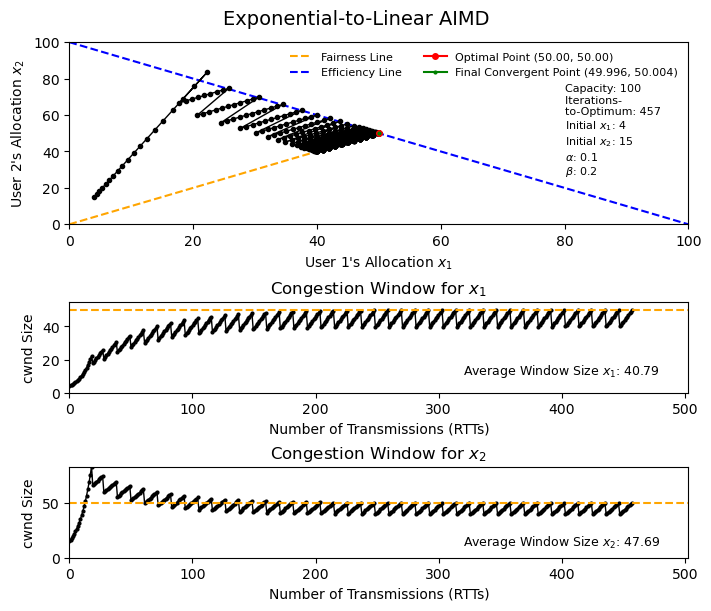

(8.752735229759299, 88.48378199639302, False)

In [5]:
exp_lin_aimd_plot(
    Cap=100,
    x1=4,
    x2=15,
    alpha=0.1,
    beta=0.2,
    output=f"Expo_Linear_AIMD.svg"
)

## 3. DCTCP (Data Center TCP) 
[Wasn't Included Due to Lack of Space]

In [6]:
'''
The 3rd algorithm is known as DCTCP, and is a version of AIMD with dynamically 
changing alpha parameter based on the current utilization of the window size. 
    Cap (int) : Maximum Capacity
    x1 (int) : Starting cnwd size of User x1
    x2 (int) : Starting cnwd size of User x2
    alpha (int) : Starts at 0 for DCTCP
    c (int) : Scaling factor for Inverse proportional Increase
    g (int) : Weight given to new samples against the past in the estimation of alpha
    output (str) : Output format of the graphs (.svg)
    title (str) : Title of the graphs
'''

def dctcp_plot (Cap:int, x1:int, x2:int, alpha:int, c:int, g:int, output:str='output.svg', title:str='DCTCP Algorithm'):
    
    x1_values = np.empty((0,))
    x2_values = np.empty((0,))
    
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)
    
    optimal = Cap/2
    
    iterations = 1
    retransmissions = 0
    iterations_to_optimum = 9999
    
    F = 0
    g = 0.01
    c = 20
    e = 0.02
    
    while (iterations < 1000):
        if (round(x1,2) == optimal and round(x2,2) == optimal):
            # If we reach optimum before running all iterations
            iterations_to_optimum = iterations
            break
            
        #Update F
        F = (x1 + x2) / Cap
        
        # Alpha update function
        alpha = (1-g) * alpha + g * F
        
        if (x1 + x2 <= Cap):
            # Additive Scaled Increase
            x1 = x1 + c/x1 + 1
            x2 = x2 + c/x2 + 1
        
        else:
            # Multiplicative Decrease
            x1 = x1 * (1 - alpha/2)
            x2 = x2 * (1 - alpha/2)
            retransmissions += 1
            
            
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)
        
        iterations += 1
    
    
    # Optimal Point
    best_x1 = Cap/2
    best_x2 = Cap/2
    
    # Max values
    max_x1 = np.max(x1_values)
    max_x2 = np.max(x2_values)
    
    # Calculate sending rates (example values)
    avg_wndsize_x1 = np.mean(x1_values)
    avg_wndsize_x2 = np.mean(x2_values)
    
    
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(7, 6), layout="constrained")
    
    # Placing the plots in the plane
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)  # Fairness/Efficiency plot
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)  # Congestion window for x1
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)  # Congestion window for x2

    #Fairness Line for Plot1
    intersection_x = Cap / 2
    x_orange = np.linspace(0, intersection_x, 100)
    plot1.plot(x_orange, x_orange, linestyle='dashed', color='orange', label='Fairness Line')
     
    #Efficiency Line for Plot1
    plot1.plot([0, Cap], [Cap, 0], linestyle='dashed', color='blue', label='Efficiency Line')
    
    # Plot x1_values and x2_values with smaller markers and thinner lines
    plot1.plot(x1_values, x2_values, marker='o', color='black', markersize=3, linewidth=1)
    
    # Plot the Optimal Point
    plot1.plot(Cap/2, Cap/2, marker='o', markersize=4, label=f'Optimal Point ({best_x1:.2f}, {best_x2:.2f})', color='red')
    
    # Convergence Point
    plot1.plot(x1_values[-1], x2_values[-1], marker='.', markersize=4, label=f"Final Convergent Point ({x1_values[-1]:.3f}, {x2_values[-1]:.3f})", color='green')
    
    # Set axis limits to start from 0
    plot1.set_xlim(0, Cap)
    plot1.set_ylim(0, Cap)
    
    # Add title and axis labels
    plot1.set_xlabel("User 1's Allocation $x_{1}$")  # Change the X-axis label here
    plot1.set_ylabel("User 2's Allocation $x_{2}$")  # Change the Y-axis label here
    
    # Add annotations for Plot1
    plot1.legend(loc='upper right', ncol=2, frameon=False, fontsize=8)
    plot1.annotate(
        f'Capacity: {Cap}\nIterations- \nto-Optimum: {iterations}\nInitial $x_{1}$: {round(x1_values[0])}\nInitial $x_{2}$: {round(x2_values[0])}\n$\\alpha$: {round(alpha,2)}\n',
        xy=(0.80 * Cap, Cap * 0.2), fontsize=8
    )
    
    # Congestion Window plot for User 1 in Plot 2
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1, markersize=4)
    plot2.set_xlabel('Number of Transmissions (RTTs)')
    plot2.set_ylabel('cwnd Size')
    plot2.set_title('Congestion Window for $x_{1}$')
    plot2.set_xlim(0, iterations * 1.1)
    plot2.set_ylim(0, max(max_x1, 1.1*Cap/2))
    plot2.annotate(f'Average Window Size $x_{1}$: {avg_wndsize_x1:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot2.grid(False)
    
    # Efficiency line for Plot 2
    plot2.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Congestion Window plot for User 2 in Plot 3
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1, markersize=4)
    plot3.set_xlabel('Number of Transmissions (RTTs)')
    plot3.set_ylabel('cwnd Size')
    plot3.set_title('Congestion Window for $x_{2}$')
    plot3.set_xlim(0, iterations * 1.1)
    plot3.set_ylim(0, max(max_x2, 1.1*Cap/2))
    plot3.annotate(f'Average Window Size $x_{2}$: {avg_wndsize_x2:.2f}', xy=(iterations*0.7, Cap/9), fontsize=9)
    plot3.grid(False)
    
    # Efficiency line for Plot 3
    plot3.axhline(y=Cap/2, color='orange', linestyle='dashed')

    # Add a main title for the figure
    fig.suptitle(title, fontsize=14)

    # Save and show the plot
    plt.savefig(output, dpi=300)
    plt.show()
    
    
    
    #STATISTICS
    #for x in x1_values:
        #print(x)
    avg_util = avg_wndsize_x1 + avg_wndsize_x2
    util_pcnt = avg_util/Cap * 100   
    retransmission_rate = retransmissions/iterations * 100
    
    #print(f"alpha : {alpha}, beta : {beta}")
    print(f"Retransmission rate = {round(retransmission_rate, 2)}% | Utilization : {round(util_pcnt,2)}% ")
    
    if (iterations_to_optimum < iterations):
        converged = True
    else:
        converged = False
    
    return retransmission_rate, util_pcnt, converged
    
    
    
    
    

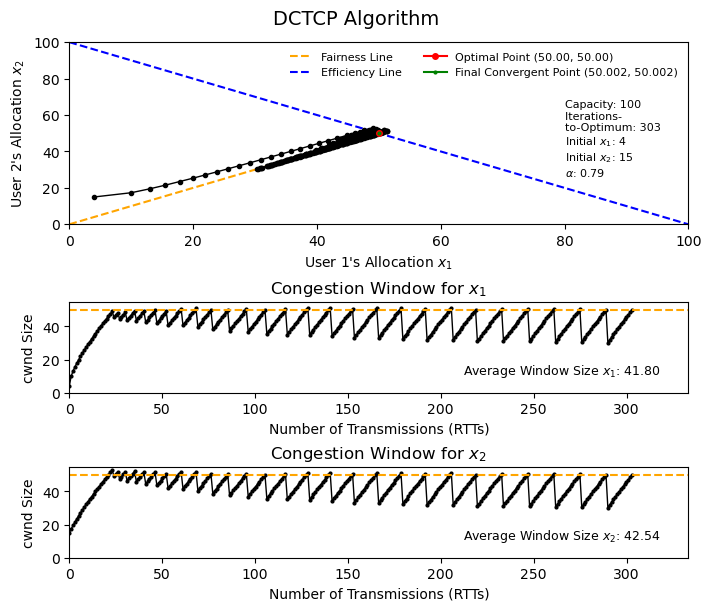

Retransmission rate = 8.91% | Utilization : 84.34% 


(8.91089108910891, 84.3386590986897, False)

In [7]:
dctcp_plot(Cap=100, x1=4, x2=15, alpha=0, c=20, g=0.01, output=f"DCTCP_aimd.svg")

## 4. Three Users AIMD

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

'''
Now we look at the classic AIMD algorithm under the condition where there 
are 3 users instead of 2. 
    Cap (int) : Maximum Capacity
    x1 (int) : Starting cnwd size of User x1
    x2 (int) : Starting cnwd size of User x2
    x3 (int) : Starting cnwd size of User x3
    alpha (int) : Experimentally Determined
    beta (int) : Experimentally Determined
    output (str) : Output format of the graphs (.svg)
    title (str) : Title of the graphs
'''

def three_user_AIMD (Cap:int, x1:int, x2:int, x3:int, alpha:int, beta:int, output:str='output.svg', title:str='3 User AIMD (TCP-Reno) Algorithm'):
    
    x1_values = np.empty((0,))
    x2_values = np.empty((0,))
    x3_values = np.empty((0,))    
    
    
    x1_values = np.append(x1_values, x1)
    x2_values = np.append(x2_values, x2)
    x3_values = np.append(x3_values, x3)
    
    optimal = Cap/3
    
    iterations = 1
    retransmissions = 0
    iterations_to_optimum = 9999999
    flag = 0
    
    x1_temp = x1
    x2_temp = x2
    x3_temp = x3
    
    while (iterations < 10000):
        if (round(x1,1) == optimal and round(x2,1) == optimal and round(x3,1) == optimal):
            # If we reach optimum before running all iterations
            break
        
        if (x1 + x2 + x3 <= Cap):
            # Additive Increase
            x1 = x1 + alpha
            x2 = x2 + alpha
            x3 = x3 + alpha
            
            
            '''if (flag):
                x1 = x1 + 1
                x2 = x2 + 1
                x3 = x3 + 1
            else:
                x1 = x1 + alpha*x1
                x2 = x2 + alpha*x2
                x3 = x3 + alpha*x3'''
        
        else:
            # Multiplicative Decrease
            x1 = x1 * (1-beta)
            x2 = x2 * (1-beta)
            x3 = x3 * (1-beta)
            flag = 1
            retransmissions += 1
            
        x1_values = np.append(x1_values, x1)
        x2_values = np.append(x2_values, x2)
        x3_values = np.append(x3_values, x3)
        
        iterations += 1
        
    # Max values
    max_x1 = np.max(x1_values)
    max_x2 = np.max(x2_values)
    max_x3 = np.max(x3_values)
        
    # Define the three points for the Efficiency Plane
    point1 = np.array([Cap, 0, 0])  # (Cap/3, 0, 0)
    point2 = np.array([0, Cap, 0])  # (0, Cap/3, 0)
    point3 = np.array([0, 0, Cap])  # (0, 0, Cap/3)
        
    # Create a figure with subplots
    fig = plt.figure(figsize=(7, 4), layout="constrained")   
    
    # 3D Plot (Top-left subplot)
    ax1 = fig.add_subplot(111, projection='3d')  # 2x2 grid, first subplot
    
    # Plot the three points
    ax1.scatter(*point1, color='r', s=100, alpha=0)
    ax1.scatter(*point2, color='g', s=100, alpha=0)
    ax1.scatter(*point3, color='b', s=100, alpha=0)
    
    x = np.linspace(0, Cap, 10)
    y = np.linspace(0, Cap, 10)
    X, Y = np.meshgrid(x, y)
    Z = (-X - Y + Cap / 3) #Equation of the plane: x + y + z = Cap/3
    Z[Z < 0] = np.nan
    
    #Plot the plane    
    ax1.plot_trisurf([point1[0], point2[0], point3[0]],  
                     [point1[1], point2[1], point3[1]],  
                     [point1[2], point2[2], point3[2]],  
                     color='cyan', alpha=0.5)
    
    #Label for the Efficiency Plane
    efficiency_plane_patch = mpatches.Patch(color=(129/255, 181/255, 180/255), label='Efficiency Plane')

    
    # Set axis labels
    ax1.set_xlabel("User 1's Allocation $x_{1}$", fontsize=8)
    ax1.set_ylabel("User 2's Allocation $x_{2}$", fontsize=8)
    ax1.set_zlabel("User 3's Allocation $x_{3}$", fontsize=8)

    # Set axis limits
    ax1.set_xlim(0, Cap*1.1)
    ax1.set_ylim(0, Cap*1.1)
    ax1.set_zlim(0, Cap*1.1)
    ax1.set_box_aspect([1,1,1])
    
    # Intersection point of the fairness line with the plane
    t_intersection = Cap / 3
    intersection_point = np.array([t_intersection, t_intersection, t_intersection])
    
    # Plot the fairness line (orange dashed)
    x_vals = np.array([0, intersection_point[0]])
    y_vals = np.array([0, intersection_point[1]])
    z_vals = np.array([0, intersection_point[2]])
    
    # Plot Fairness Line
    fairness_line, = ax1.plot(x_vals, y_vals, z_vals, color='orange', linestyle='--', label='Fairness Line')
    
    # Plot the Data
    ax1.plot(x1_values, x2_values, x3_values, color='black', marker='o', markersize=1, linewidth=1)
    
    # Plot Annotation
    ax1.text(
        0.60 * Cap,           # x position in 3D
        0.20 * Cap,           # y position in 3D
        0.70 * Cap,           # z position in 3D (you can adjust this to place it in the desired plane)
        f'Capacity: {Cap}\n'
        f'Iterations: {iterations}\n'
        f'Initial x_1: {round(x1_values[0], 2)}\n'
        f'Initial x_2: {round(x2_values[0], 2)}\n'
        f'Initial x_3: {round(x3_values[0], 2)}\n'
        f'$\\alpha$: {round(alpha, 2)}\n'
        f'$\\beta$: {beta}\n',
        fontsize=8,
        color='black'         # Set the text color (optional)
    )
    
    
    #Plot Convergent Point
    ax1.scatter(x1_values[-1], x2_values[-1], x3_values[-1], marker='.', s=120, label=f"Final Convergent Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f}, {x3_values[-1]:.2f})", color='red')
    
    # Label for Convergent Point
    convergent_point = Line2D([0], [0], marker='o', color='red', markerfacecolor='red', markersize=6, label=f"Final Convergent Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f}, {x3_values[-1]:.2f})")
    
    # Define the optimal point
    optimal_point = np.array([Cap/3, Cap/3, Cap/3])
    
    # Plot Optimal Point
    ax1.scatter(*optimal_point, color='green', s=80, label=f'Optimal Point ({optimal_point[0]:.2f}, {optimal_point[1]:.2f}, {optimal_point[2]:.2f})')
    
    # Label for Optimal Point
    optimal_line = Line2D([0], [0], marker='o', color='green', markerfacecolor='green', markersize=6, label=f'Optimal Point ({optimal_point[0]:.2f}, {optimal_point[1]:.2f}, {optimal_point[2]:.2f})')
    
    # Add a legend
    ax1.legend(handles=[efficiency_plane_patch, fairness_line, convergent_point, optimal_line], ncol=1, frameon=False, fontsize=8, loc='upper left')
    
    # Add a main title for the figure
    fig.suptitle(title, fontsize=14)
    
    # Set the view angle of the 3D plot (azimuth, elevation)
    ax1.view_init(azim=-80, elev=30) 
    
    # Save and show the plot
    plt.savefig(output, dpi=300, bbox_inches='tight')
    plt.show()
    
    
    #This plane that you made is called the Efficiency Plane. Now I need to make the fairness line from Perron Frobenius. And this line should be a vector paralell to [1,1,1], and it should extend from origin to the intersection of the Efficiency Plane.
    

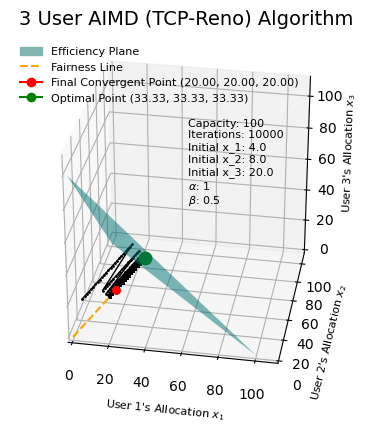

In [9]:
three_user_AIMD(Cap=100, x1=4, x2=8, x3=20, alpha=1, beta=0.5, output=f"Three_User_aimd.svg")